In [112]:
 
import random
import numpy as np
import torch

#seed = 12314
#random.seed(seed)
#np.random.seed(seed)
#torch.manual_seed(seed)
#torch.cuda.manual_seed_all(seed)

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.11137611 0.01855818 0.59537205 ... 0.31747653 0.07536831 0.16380252]
 [0.03521916 0.00586843 0.1882675  ... 0.10039187 0.02383283 0.05179734]
 [0.07722495 0.0128677  0.41281363 ... 0.22012897 0.05225819 0.11357589]
 ...
 [0.07148657 0.01191154 0.38213858 ... 0.20377179 0.04837503 0.10513638]
 [0.06758    0.0112606  0.3612556  ... 0.19263614 0.04573144 0.09939092]
 [0.0886725  0.01477516 0.47400764 ... 0.2527601  0.06000475 0.13041197]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.2325822  -0.08212815  0.58623206 ...  0.2994008   0.21802555
   0.03671663]
 [ 0.05627608  0.02631346  0.13883793 ...  0.07666796 -0.1334147
   0.22693318]
 [ 0.05553545 -0.07987012  0.63839403 ...  0.20114894  0.0434277
   0.06841629]
 ...
 [ 0.10337325 -0.06772388  0.52201634 ...  0.23523927 -0.05209864
   0.11463346]
 [ 0.19068299 -0.03130312  0.37573914 ...  0.00423204 -0.10491056
   0.20177404]
 [ 0.05577631  0.07122154  0.56517749 ...  0.48293812  0.07388071
   0.1680

In [113]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [114]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [115]:
type(mycebmf)

cEBMF.cEBMF_object

In [116]:
K = np.min([K, U.shape[1]])
print(K)

5


In [117]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.08281877  0.16998316 -0.20255867  0.14155388  0.41056776  0.09435707
 -0.14574634 -0.05295431  0.10985818 -0.0697877  -0.13715057  0.32878992
  0.00345685  0.12393099  0.1270971  -0.3392636   0.28901908 -0.36658865
 -0.00648407 -0.10501424 -0.06488555  0.16588354 -0.02013026 -0.28396308
  0.06628544 -0.04774436  0.16876054 -0.09740324  0.08481042 -0.22915472
 -0.26720896  0.14091691  0.08371365  0.09370026  0.21074326  0.11960019
  0.07524851  0.2524423   0.02504155 -0.14828546 -0.30686423 -0.32418394
  0.08033595 -0.04626721 -0.24705203  0.01331842  0.02724841  0.09715332
  0.09729432 -0.03093401]
[ 0.13137226 -0.13931176 -0.30083862  0.08722077  0.27536473  0.0034356
  0.04644969  0.0343543   0.07107732 -0.0392943   0.21176581 -0.07590559
 -0.20128402  0.10900765 -0.12981795 -0.11936983  0.11333651 -0.07626745
 -0.19012235 -0.23299319 -0.03325456  0.0025811   0.46502852 -0.19668351
 -0.15456226 -0.01521541 -0.14774758  0.13332346  0.10959917 -0.10965239
 -0.11789612  0.04011662  

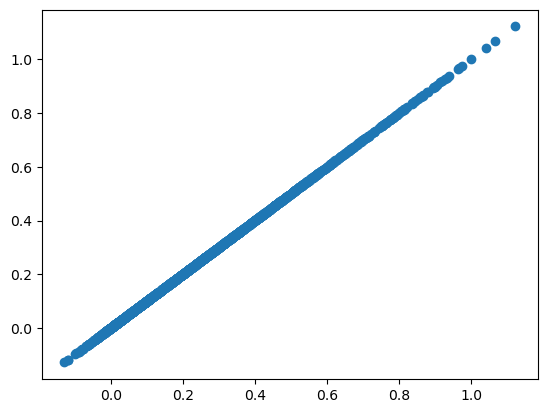

In [118]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

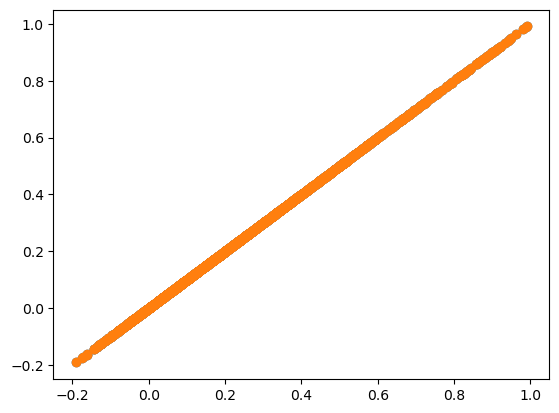

In [119]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [120]:
mycebmf.update_tau()
mycebmf.tau

array([[154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014],
       [154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014],
       [154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014],
       ...,
       [154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014],
       [154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014],
       [154.74014, 154.74014, 154.74014, ..., 154.74014, 154.74014,
        154.74014]], dtype=float32)

In [121]:
mycebmf.prior_F

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [122]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000002A0A050CC10>


In [123]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.25715795, -0.03608386, -1.3530154 , -0.7508719 , -1.4189975 ,
        -0.7782098 , -0.34406328, -1.2112656 , -0.8585412 , -0.11873697,
        -1.4750197 , -0.08236955, -0.35022026, -0.8608712 , -1.1572775 ,
        -0.8768428 , -0.9266675 , -0.05380799, -0.8990965 , -1.1101745 ,
        -1.2510432 , -0.16647756, -0.5991196 , -0.8992763 , -0.778075  ,
        -1.2303293 , -1.0959138 , -0.6272313 , -0.89369184, -0.61776423,
        -0.11106464, -0.8181708 , -0.8151896 , -1.2988306 , -1.3177726 ,
        -1.3193302 , -0.6244502 , -0.62303567, -0.17699939, -0.32569218],
       dtype=float32),
 array([0.03153712, 0.03153712, 0.03153712, 0.03153712, 0.03153712,
        0.03153712, 0.03153712, 0.03153712, 0.03153712, 0.03153712,
        0.03153712, 0.03153712, 0.03153712, 0.03153712, 0.03153712,
        0.03153712, 0.03153712, 0.03153712, 0.03153712, 0.03153712,
        0.03153712, 0.03153712, 0.03153712, 0.03153712, 0.03153712,
        0.03153712, 0.03153712, 0.03153712, 0.031537

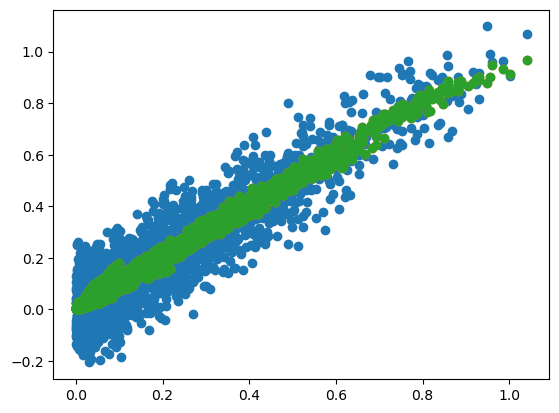

In [124]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


In [125]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
          

0.00333499596376957

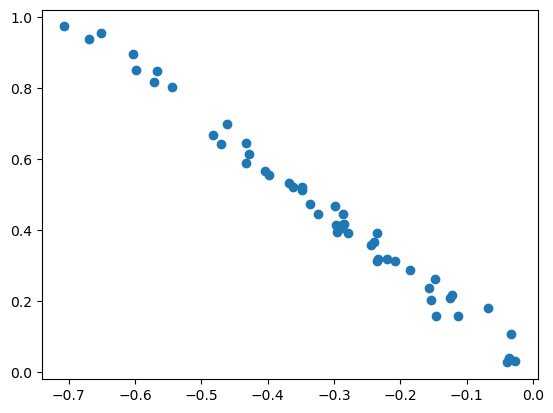

In [126]:
plt.scatter(mycebmf.L[:,0], u)

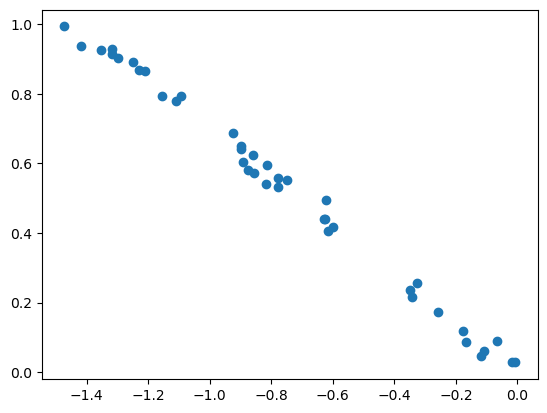

In [127]:
plt.scatter(mycebmf.F[:,0], v)

In [128]:
mycebmf.L[:,1]

array([-1.1806649e-09,  2.3278373e-09, -2.8537508e-09,  1.8917354e-09,
        6.2909056e-09,  1.2108092e-09, -2.0301820e-09, -7.4226747e-10,
        1.4503646e-09, -9.5211694e-10, -1.9198412e-09,  4.7752127e-09,
        1.3239687e-11,  1.6254140e-09,  1.7051990e-09, -5.0735505e-09,
        4.1373456e-09, -5.5192957e-09, -1.3335187e-10, -1.5141336e-09,
       -9.4323938e-10,  2.2079816e-09, -3.0485683e-10, -4.1451926e-09,
        8.9637903e-10, -6.7260980e-10,  2.3110018e-09, -1.3690286e-09,
        1.1362201e-09, -3.2435077e-09, -3.8182431e-09,  1.8903556e-09,
        1.0864719e-09,  1.2720454e-09,  2.8860947e-09,  1.6016842e-09,
        9.7767516e-10,  3.5533909e-09,  3.0003774e-10, -2.0756343e-09,
       -4.4541113e-09, -4.7562194e-09,  1.0377548e-09, -6.5427697e-10,
       -3.4895862e-09,  1.1605476e-10,  3.5517334e-10,  1.2900364e-09,
        1.2939327e-09, -4.5868995e-10], dtype=float32)

In [129]:
for i in range(40):
    mycebmf.iter()

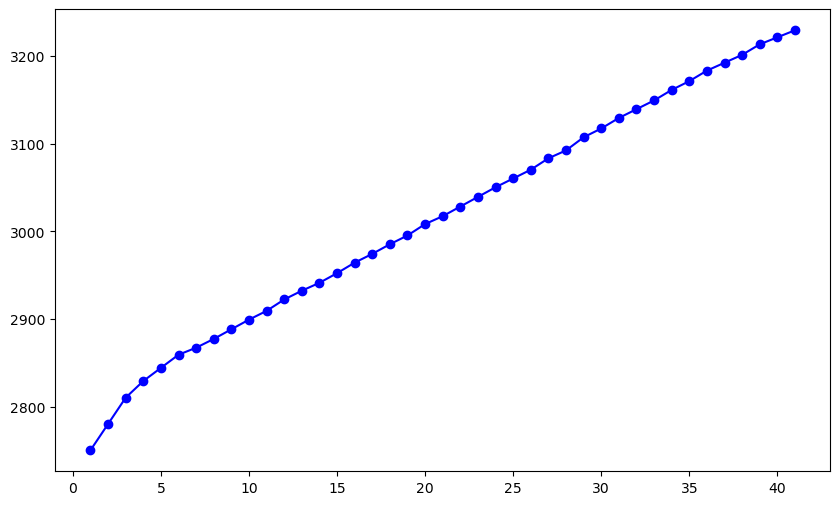

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

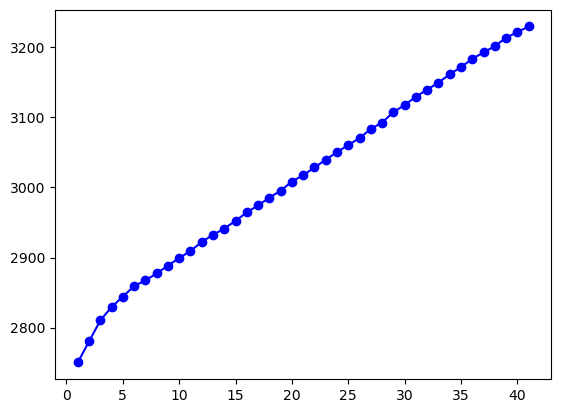

In [131]:
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

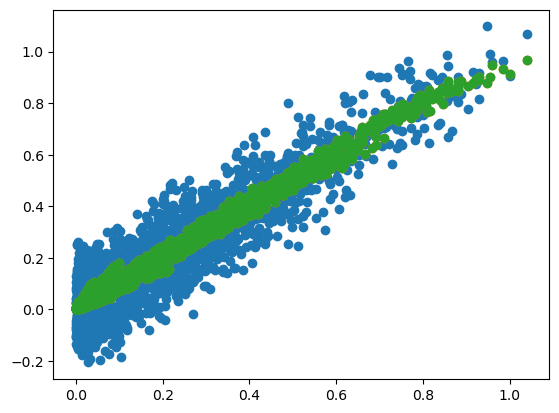

In [132]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [133]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
 

0.00418968731512602

In [ ]:

results = []

for i in range(40):
    # Parameters
    n, p = 50, 40  # Dimensions of the matrix
    noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
    u = np.random.rand(n)  # Vector of length n
    v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
    rank_1_matrix = np.outer(u, v)
 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    noise = np.random.normal(0, noise_std, size=(n, p))
    noisy_matrix = rank_1_matrix + noise
    mycebmf= cEBMF(data= noisy_matrix)
    mycebmf.init_LF()
    for j in range(40):
        mycebmf.iter()

        rr = np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
            
        results.append( rr)
 

NameError: name 'np' is not defined

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()